In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ls ../results/muestras

gaussian_1_1e6/  kraskov_1/  kraskov_2/


In [3]:
ls ../results/firing_rates_1e5

copulas_4Ldmn/        copulas_visual/       kraskov_random/
copulas_4Ldmn_drug/   copulas_visual_drug/  kraskov_random_drug/
copulas_dmn/          kraskov_4Ldmn/        kraskov_visual/
copulas_dmn_drug/     kraskov_4Ldmn_drug/   kraskov_visual_drug/
copulas_random/       kraskov_dmn/
copulas_random_drug/  kraskov_dmn_drug/


In [4]:
is_dmn = True

In [5]:
if is_dmn:
    results_folder = "../results/firing_rates_1e5/"
else:
    results_folder = "../results/muestras/kraskov_2/"

gaussian_results = {}
for gaussian_i in sorted(os.listdir(results_folder)):
    gaussian_i_folder = os.path.join(results_folder, gaussian_i)
    gaussian_results[gaussian_i] = {
        "mean": [],
        "std": []
    }
    for n_data in sorted(os.listdir(gaussian_i_folder)):
        try:
            data_filepath = os.path.join(gaussian_i_folder, n_data, "results_samples.txt")
            data = np.loadtxt(data_filepath, delimiter=",")
        except:
            data_filepath = os.path.join(gaussian_i_folder, n_data, "results_samples.npy")
            data = np.load(data_filepath)
        print(gaussian_i, n_data, data.shape, data_filepath)
        data_mean, data_std = data.mean(axis=0), data.std(axis=0)
        gaussian_results[gaussian_i]["mean"].append(data_mean)
        gaussian_results[gaussian_i]["std"].append(data_std)

copulas_4Ldmn 100 (100, 3) ../results/firing_rates_1e5/copulas_4Ldmn/100/results_samples.npy
copulas_4Ldmn 1000 (100, 3) ../results/firing_rates_1e5/copulas_4Ldmn/1000/results_samples.npy
copulas_4Ldmn 10000 (100, 3) ../results/firing_rates_1e5/copulas_4Ldmn/10000/results_samples.npy
copulas_4Ldmn 100000 (100, 3) ../results/firing_rates_1e5/copulas_4Ldmn/100000/results_samples.npy
copulas_4Ldmn_drug 100 (100, 3) ../results/firing_rates_1e5/copulas_4Ldmn_drug/100/results_samples.npy
copulas_4Ldmn_drug 1000 (100, 3) ../results/firing_rates_1e5/copulas_4Ldmn_drug/1000/results_samples.npy
copulas_4Ldmn_drug 10000 (100, 3) ../results/firing_rates_1e5/copulas_4Ldmn_drug/10000/results_samples.npy
copulas_4Ldmn_drug 100000 (100, 3) ../results/firing_rates_1e5/copulas_4Ldmn_drug/100000/results_samples.npy
copulas_dmn 100 (100, 3) ../results/firing_rates_1e5/copulas_dmn/100/results_samples.npy
copulas_dmn 1000 (100, 3) ../results/firing_rates_1e5/copulas_dmn/1000/results_samples.npy
copulas_dmn 

In [6]:
gaussian_results

{'copulas_4Ldmn': {'mean': [array([0.187482, 0.183844, 0.003643]),
   array([0.022296, 0.022168, 0.000127]),
   array([6.023e-03, 5.996e-03, 2.600e-05]),
   array([3.684e-03, 3.666e-03, 4.000e-06])],
  'std': [array([0.10630364, 0.10342434, 0.0191347 ]),
   array([0.01333798, 0.01293688, 0.00103893]),
   array([2.82201541e-03, 2.80024713e-03, 9.01332347e-05]),
   array([1.15080146e-03, 1.14736394e-03, 1.95959179e-05])]},
 'copulas_4Ldmn_drug': {'mean': [array([0.181425, 0.179153, 0.00227 ]),
   array([0.023795, 0.023685, 0.00011 ]),
   array([4.946e-03, 4.914e-03, 2.600e-05]),
   array([0.002903, 0.002898, 0.      ])],
  'std': [array([0.1017017 , 0.09741503, 0.0227826 ]),
   array([0.01357483, 0.01343046, 0.00103213]),
   array([2.47282915e-03, 2.43893501e-03, 9.55196315e-05]),
   array([0.00067904, 0.0006772 , 0.        ])]},
 'copulas_dmn': {'mean': [array([1.258008, 1.233194, 0.024816]),
   array([0.179146, 0.175071, 0.004078]),
   array([0.057466, 0.053062, 0.0044  ]),
   array([0

In [7]:
try:
    with open("../data/muestras_1e5/index.json", "r") as f:
        index = json.load(f)
except:
    pass

In [8]:
index

{'gaussian_1': {'cov': [[0.9486545337793236,
    0.8898027211921073,
    0.6100372359467587],
   [0.8898027211921073, 0.8713281325959036, 0.5399206528673799],
   [0.6100372359467587, 0.5399206528673799, 0.4206449508316386]],
  'TC': 14.942948002189445,
  'DTC': 24.511912843159863,
  'O': -9.568964840970418,
  'TC_list': [2.284166784638797, 12.658781217550647],
  'DTC_list': [12.658781217550647, 11.853131625609215]},
 'gaussian_2': {'cov': [[1.7820428291000843,
    2.0761737700739205,
    1.8630084127252586],
   [2.0761737700739205, 2.45134450246227, 2.20499211418001],
   [1.8630084127252586, 2.20499211418001, 2.0013729474860438]],
  'TC': 6.553575100639645,
  'DTC': 3.9794005557070147,
  'O': 2.5741745449326308,
  'TC_list': [3.118657082641789, 3.4349180179978562],
  'DTC_list': [3.4349180179978562, 0.5444825377091584]},
 'gaussian_3': {'cov': [[1.4047522276240016,
    0.7133489283801965,
    1.3754991844892672],
   [0.7133489283801965, 1.1990381936177523, 1.2639095070810848],
   [1.37

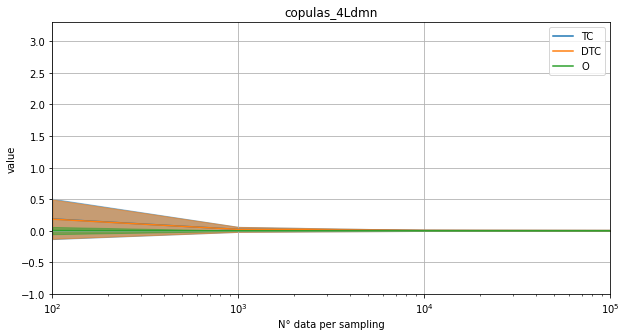

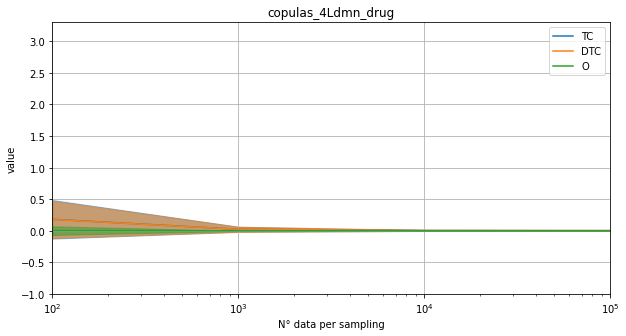

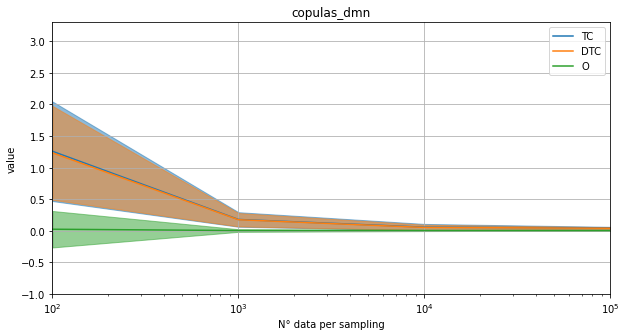

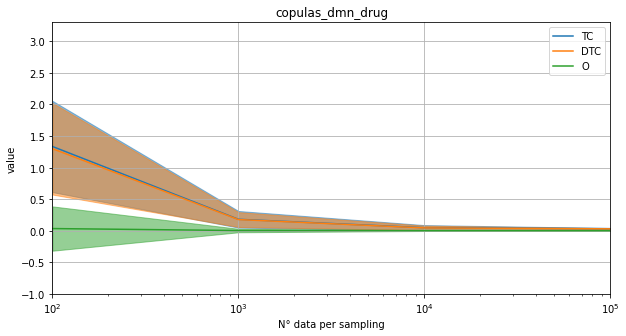

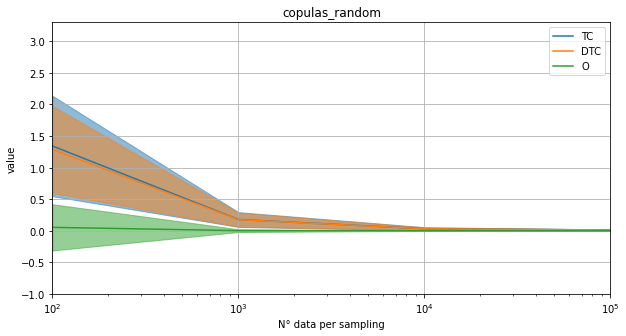

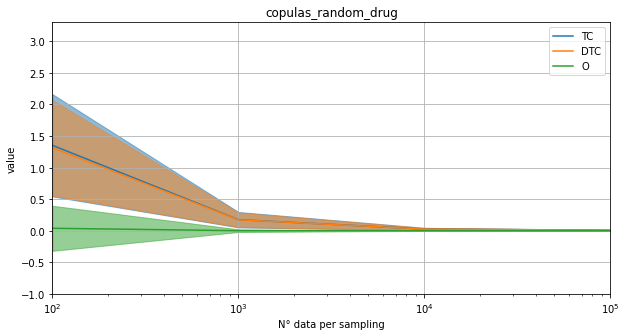

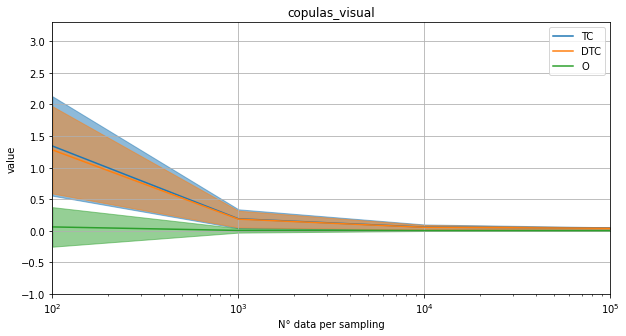

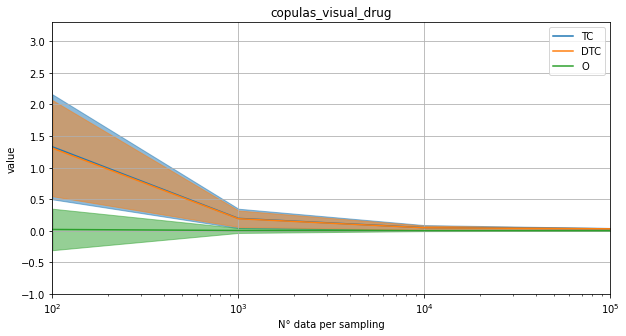

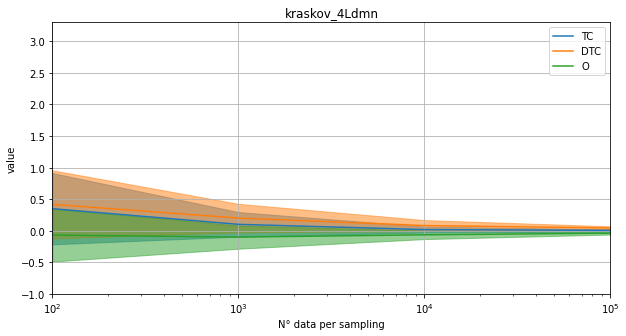

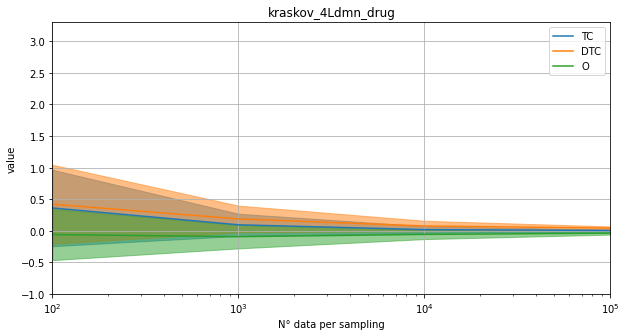

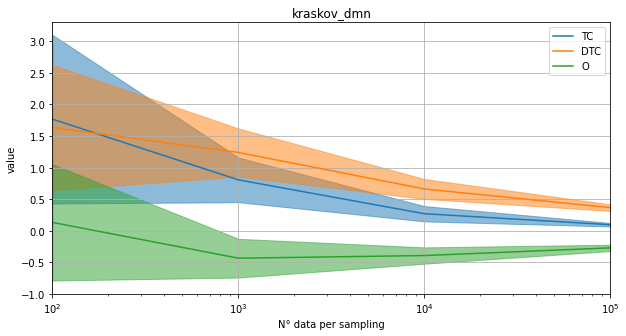

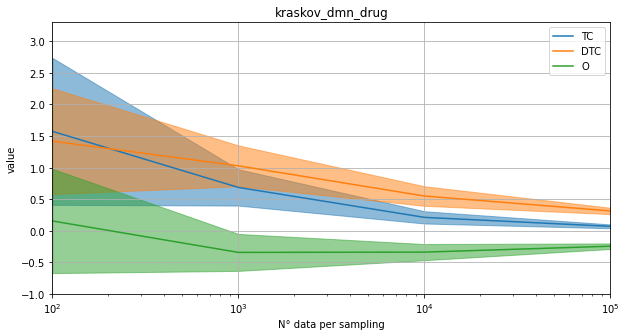

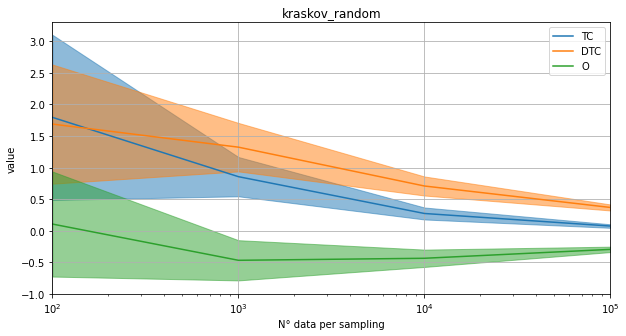

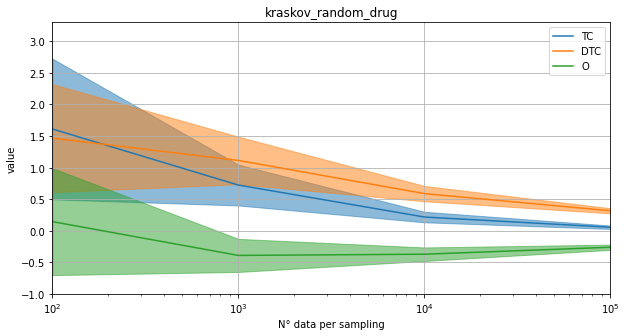

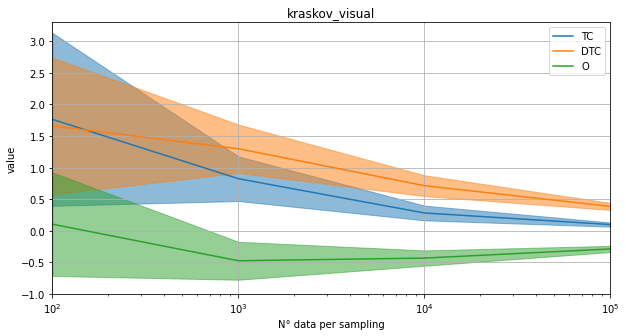

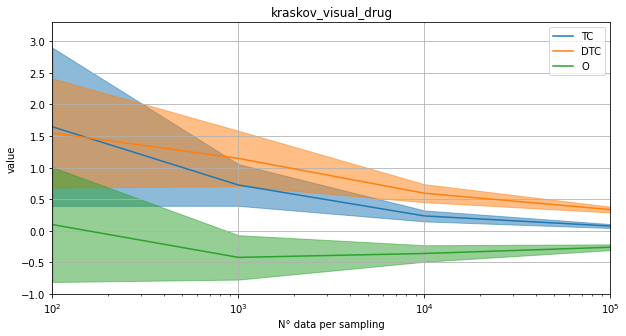

In [9]:
metrics_plot = ["TC", "DTC", "O"]
index_data = [100, 1000, 10000, 100000] #index_data = [100, 1000, 10000, 100000, 1000000]
for gaussian_i in sorted(os.listdir(results_folder)):
    try:
        fig, ax = plt.subplots(figsize=(10,5))
        mean = pd.DataFrame(gaussian_results[gaussian_i]["mean"], columns=["TC", "DTC", "O"], index=index_data)
        std = pd.DataFrame(gaussian_results[gaussian_i]["std"], columns=["TC", "DTC", "O"], index=index_data)
        mean[metrics_plot].plot(ax=ax)
        for i, metric_plot in enumerate(metrics_plot):
            ax.fill_between(mean.index, mean[metric_plot]-3*std[metric_plot], mean[metric_plot]+3*std[metric_plot], color=f"C{i}", alpha=0.5)
            if not is_dmn:
                ax.axhline(y=index[gaussian_i][metric_plot], color=f'C{i}', linestyle='--')
        ax.set_title(f"{gaussian_i}")
        ax.set_xscale('log')
        ax.set_xlim(index_data[0], index_data[-1])
        ax.grid()
        ax.set_xlabel("N° data per sampling")
        ax.set_ylabel("value")
        ax.set_ylim(-1, 3.3)
        fig.savefig(f"../results/plots/{gaussian_i}.pdf")
    except:
        print("probably an error with index_data")
        pass

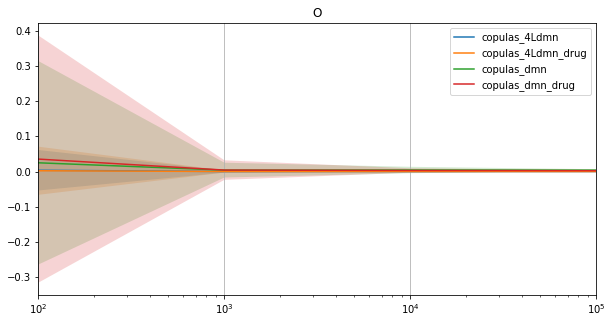

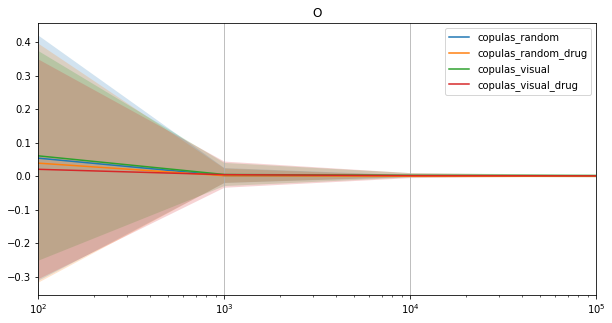

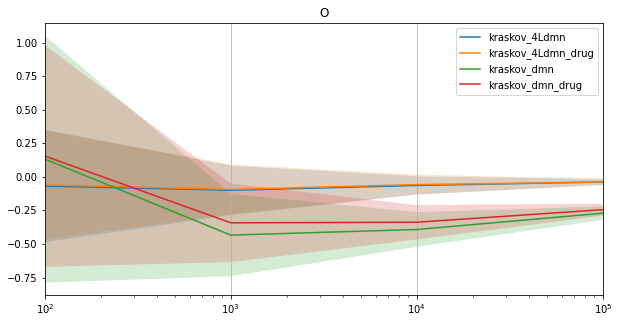

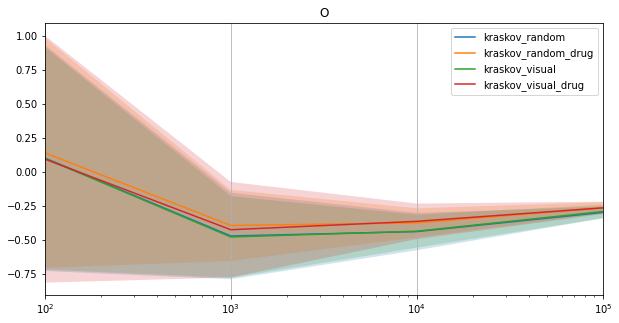

In [10]:
metric_plot = "O"
i = 0
for gaussian_i in sorted(os.listdir(results_folder)):
    if i % 4 == 0:
        i = 0
        fig, ax = plt.subplots(figsize=(10,5))
    mean = pd.DataFrame(gaussian_results[gaussian_i]["mean"], columns=["TC", "DTC", "O"], index=index_data)
    std = pd.DataFrame(gaussian_results[gaussian_i]["std"], columns=["TC", "DTC", "O"], index=index_data)
    mean = mean.rename(columns={metric_plot: gaussian_i})
    mean[[gaussian_i]].plot(ax=ax)
    ax.fill_between(mean.index, mean[gaussian_i]-3*std[metric_plot], mean[gaussian_i]+3*std[metric_plot], alpha=0.2)
    if not is_dmn:
        ax.axhline(y=index[gaussian_i][metric_plot], color=f"C{i}", linestyle='--')
    ax.set_xscale('log')
    ax.set_title(metric_plot)
    plt.xlim(10**2, 10**5)
    plt.grid(axis="x")
    #fig.savefig(f"../results/plots/groups/group_{metric_plot}_{gaussian_i}.png")
    i += 1